In [10]:
import pandas as pd

boston = pd.read_csv("Boston.csv")[["rm", "medv"]]
boston

,rm,medv
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


<Axes: xlabel='rm', ylabel='medv'>

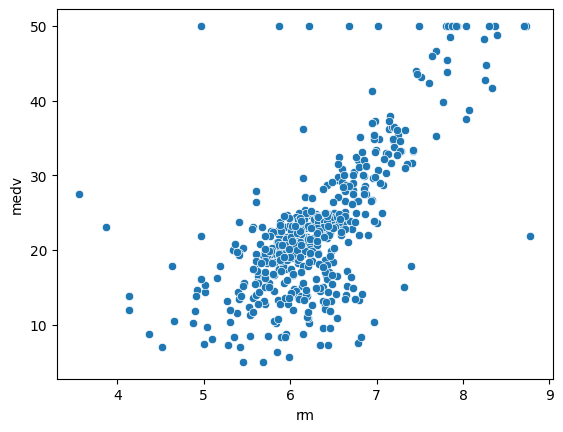

In [13]:
import seaborn as sns

sns.scatterplot(data=boston, x = "rm", y ="medv")

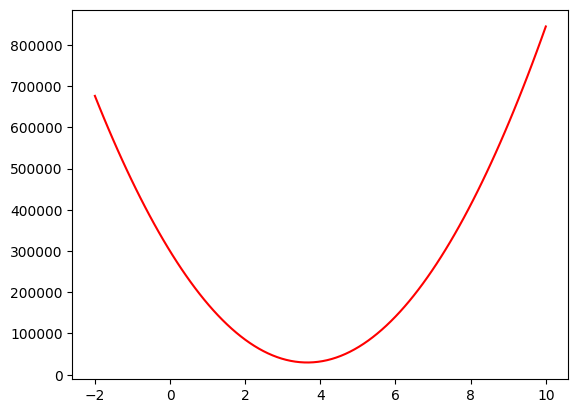

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def loss(w, x, y):
  w = np.array(w)
  return np.sum(
      (w[:,None]* x.to_numpy()[None, :]  - y.to_numpy()[None, :])**2,
      axis=1
  )

w = np.linspace(-2, 10, num=100)

x = boston["rm"]
y = boston["medv"]

plt.plot(w, loss(w,x,y), "r-")

Text(3.732927906253556, [29564.22093951], '$w_{10}$')

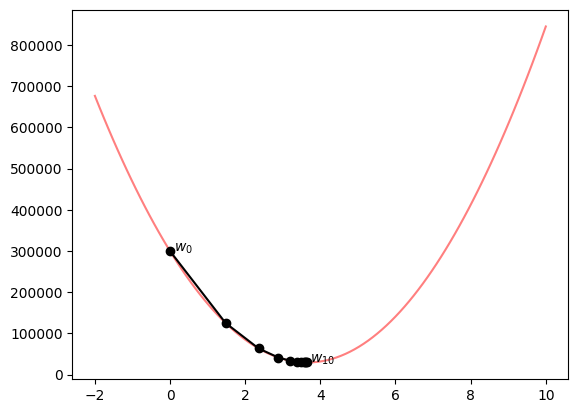

In [21]:
rho = 1e-5

def grad_loss(w_t, x, y):
    return np.sum(
        2 * (w_t * x - y) * x
    )

ww = np.linspace(-2, 10, num=100)
plt.plot(ww, loss(ww, x, y), "r-", alpha=.5);

w = [0.]
for t in range(10):
    w_update = w[t] - rho * grad_loss(w[t], x, y)
    w.append(w_update)

plt.plot(w, loss(w, x, y), "ko-")
plt.text(x=w[0]+.1, y=loss([w[0]], x, y), s="$w_{0}$")
plt.text(x=w[10]+.1, y=loss([w[10]], x, y), s="$w_{10}$")

Text(1.3363287454851258, [147766.17657479], '$w_{10}$')

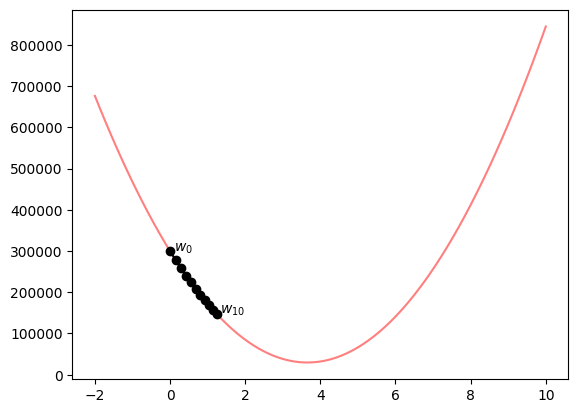

In [22]:
rho = 1e-6

ww = np.linspace(-2, 10, num=100)
plt.plot(ww, loss(ww, x, y), "r-", alpha=.5)

w = [0.]
for t in range(10):
    w_update = w[t] - rho * grad_loss(w[t], x, y)
    w.append(w_update)

plt.plot(w, loss(w, x, y), "ko-")
plt.text(x=w[0]+.1, y=loss([w[0]], x, y), s="$w_{0}$")
plt.text(x=w[10]+.1, y=loss([w[10]], x, y), s="$w_{10}$")

Text(-1.953449215203051, [458986.62081473], '$w_{10}$')

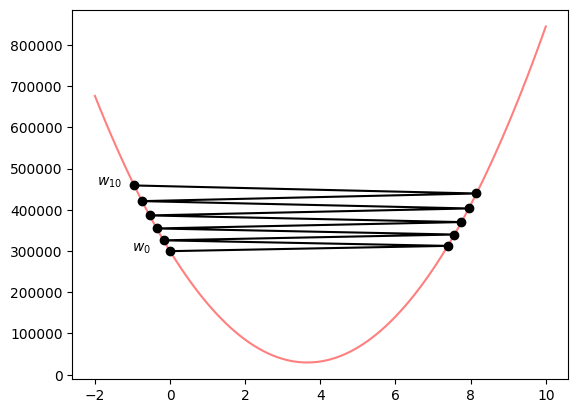

In [24]:
rho = 5e-5

ww = np.linspace(-2, 10, num=100)
plt.plot(ww, loss(ww, x, y), "r-", alpha=.5)
w = [0.]
for t in range(10):
    w_update = w[t] - rho * grad_loss(w[t], x, y)
    w.append(w_update)

plt.plot(w, loss(w, x, y), "ko-")
plt.text(x=w[0]-1., y=loss([w[0]], x, y), s="$w_{0}$")
plt.text(x=w[10]-1., y=loss([w[10]], x, y), s="$w_{10}$")